# Evaluation visualizations

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
eval = pd.read_csv("eval_stats.csv")

In [5]:
eval.head(10)

,dataset,learning_type,model,max_total_steps,validate_iter,f1_micro_graphsage,fi_macro_graphsage,f1_micro_baseline,f1_macro_baseline
0,cora,unsup,mean,1000,10,0.369973,0.367440,0.21366,0.191429
1,cora,unsup,maxpool,1000,10,0.398551,0.385509,0.21366,0.191429
2,cora,unsup,meanpool,1000,10,0.371230,0.343583,0.21366,0.191429
3,cora,unsup,gcn,1000,10,0.497890,0.483079,0.21366,0.191429
4,cora,unsup,seq,1000,10,0.363834,0.338888,0.21366,0.191429
5,cora,sup,mean,1000,10,0.751680,0.680800,0.21366,0.191429
6,cora,sup,maxpool,1000,10,0.014650,0.006490,0.21366,0.191429
7,cora,sup,meanpool,1000,10,0.509190,0.277210,0.21366,0.191429
8,cora,sup,gcn,1000,10,0.784550,0.777800,0.21366,0.191429
9,cora,sup,seq,1000,10,0.776620,0.680330,0.21366,0.191429


# Bar Plot: F1 scores (micro and macro) for different models and learning types

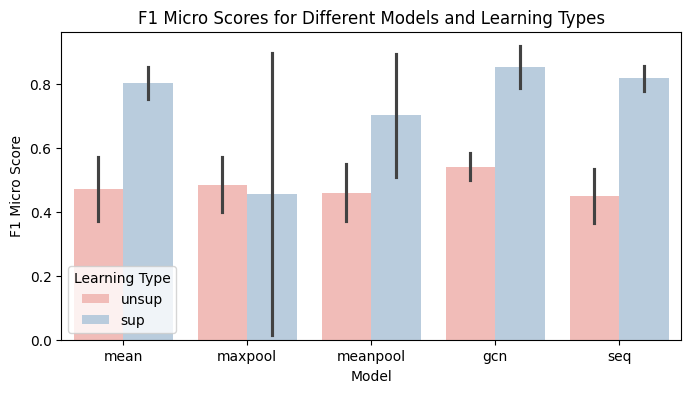

In [31]:
plt.figure(figsize=(8, 4))
sns.barplot(data=eval, x="model", y="f1_micro_graphsage", hue="learning_type", palette="Pastel1")
plt.title("F1 Micro Scores for Different Models and Learning Types")
plt.xlabel("Model")
plt.ylabel("F1 Micro Score")
plt.legend(title="Learning Type")
plt.show()

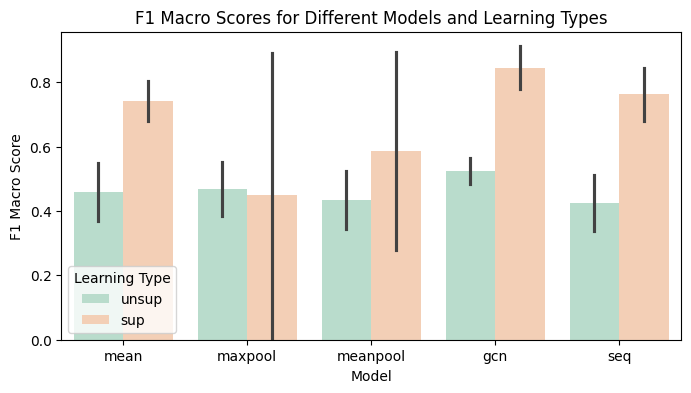

In [32]:
plt.figure(figsize=(8, 4))
sns.barplot(data=eval, x="model", y="fi_macro_graphsage", hue="learning_type", palette="Pastel2")
plt.title("F1 Macro Scores for Different Models and Learning Types")
plt.xlabel("Model")
plt.ylabel("F1 Macro Score")
plt.legend(title="Learning Type")
plt.show()


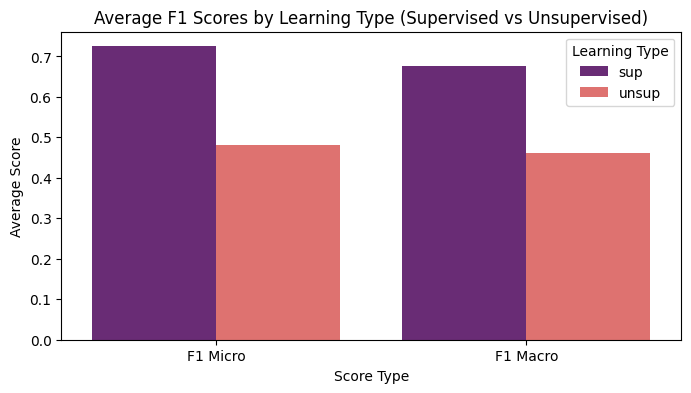

In [33]:
# mean F1 scores (micro and macro) grouped by learning type
avg_scores = eval.groupby("learning_type").agg({
    "f1_micro_graphsage": "mean",
    "fi_macro_graphsage": "mean"
}).reset_index()

# reshaping
avg_scores_melted = avg_scores.melt(id_vars="learning_type", 
                                    value_vars=["f1_micro_graphsage", "fi_macro_graphsage"], 
                                    var_name="Score Type", 
                                    value_name="Average Score")

avg_scores_melted["Score Type"] = avg_scores_melted["Score Type"].replace({
    "f1_micro_graphsage": "F1 Micro",
    "fi_macro_graphsage": "F1 Macro"
})

plt.figure(figsize=(8, 4))
sns.barplot(data=avg_scores_melted, x="Score Type", y="Average Score", hue="learning_type", palette="magma")
plt.title("Average F1 Scores by Learning Type (Supervised vs Unsupervised)")
plt.xlabel("Score Type")
plt.ylabel("Average Score")
plt.legend(title="Learning Type")
plt.show()


## Line Plot: Comparison of F1 scores (micro) across datasets

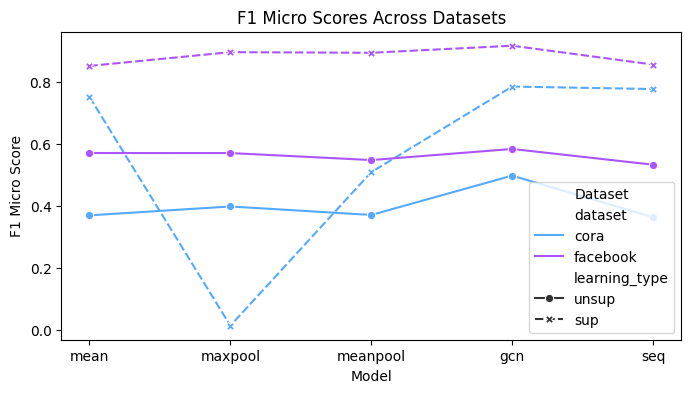

In [34]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=eval, x="model", y="f1_micro_graphsage", hue="dataset", style="learning_type", markers=True, palette="cool")
plt.title("F1 Micro Scores Across Datasets")
plt.xlabel("Model")
plt.ylabel("F1 Micro Score")
plt.legend(title="Dataset")
plt.show()

## Scatter Plot: GraphSAGE vs. Baseline F1 scores

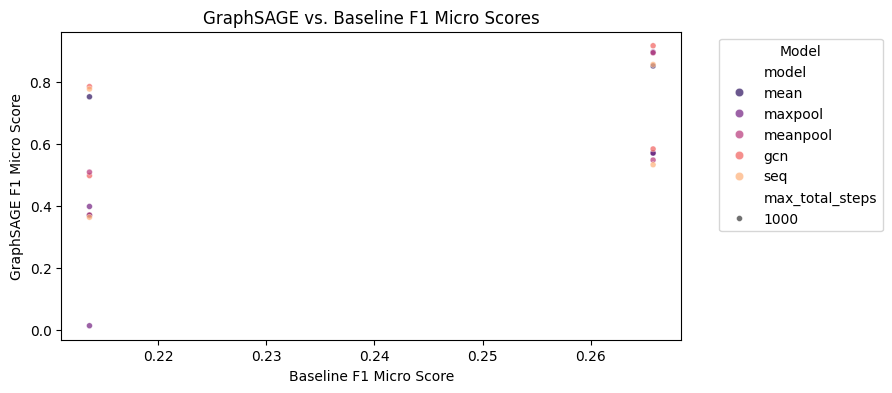

In [35]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=eval, x="f1_micro_baseline", y="f1_micro_graphsage", hue="model", size="max_total_steps", alpha=0.7, palette="magma")
plt.title("GraphSAGE vs. Baseline F1 Micro Scores")
plt.xlabel("Baseline F1 Micro Score")
plt.ylabel("GraphSAGE F1 Micro Score")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Box Plot: F1 scores grouped by dataset and learning type



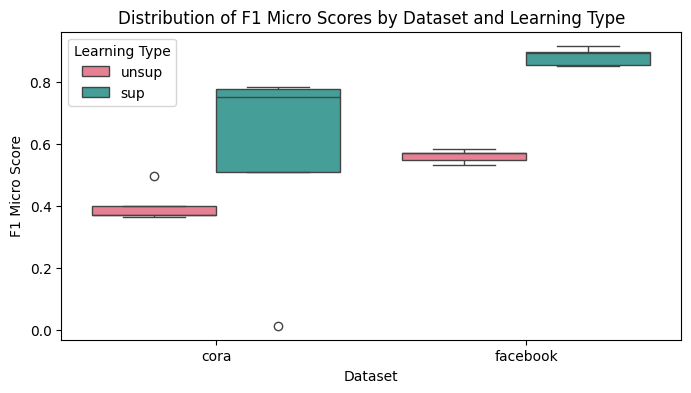

In [36]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=eval, x="dataset", y="f1_micro_graphsage", hue="learning_type", palette="husl")
plt.title("Distribution of F1 Micro Scores by Dataset and Learning Type")
plt.xlabel("Dataset")
plt.ylabel("F1 Micro Score")
plt.legend(title="Learning Type")
plt.show()

## Heatmap: F1 Macro scores for each model and dataset

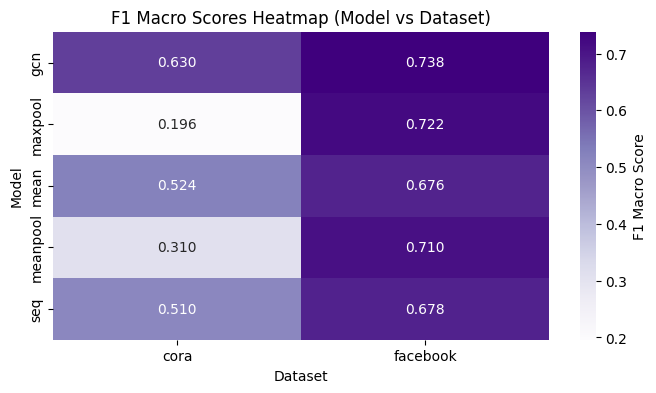

In [37]:
heatmap_data = eval.pivot_table(index="model", columns="dataset", values="fi_macro_graphsage", aggfunc="mean")
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="Purples", cbar_kws={'label': 'F1 Macro Score'})
plt.title("F1 Macro Scores Heatmap (Model vs Dataset)")
plt.xlabel("Dataset")
plt.ylabel("Model")
plt.show()

## Network Graph: Relationships between models, datasets, and learning types

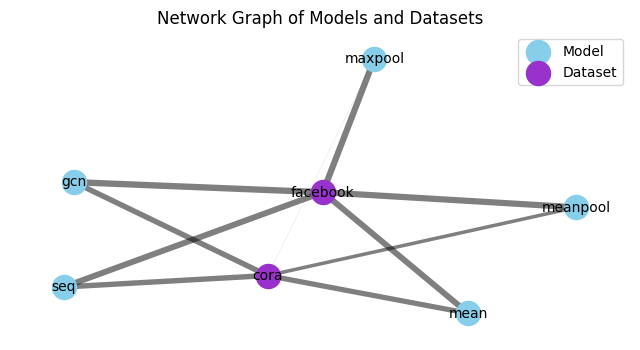

In [40]:
import networkx as nx

# Creating a graph
G = nx.Graph()

# Adding nodes (models and datasets)
for model in eval['model'].unique():
    G.add_node(model, type='model')

for dataset in eval['dataset'].unique():
    G.add_node(dataset, type='dataset')

# Adding edges based on learning type
for _, row in eval.iterrows():
    G.add_edge(row['model'], row['dataset'], weight=row['f1_micro_graphsage'])

# Drawing the graph
plt.figure(figsize=(8, 4))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes if G.nodes[n]['type'] == 'model'], node_color='skyblue', label='Model')
nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes if G.nodes[n]['type'] == 'dataset'], node_color='darkorchid', label='Dataset')
nx.draw_networkx_edges(G, pos, width=[G[u][v]['weight'] * 5 for u, v in G.edges], alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("Network Graph of Models and Datasets")
plt.legend(["Model", "Dataset"])
plt.axis("off")
plt.show()